<a href="https://colab.research.google.com/github/tnc-br/ddf_common/blob/ddf_ee_api/ddf_ee_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

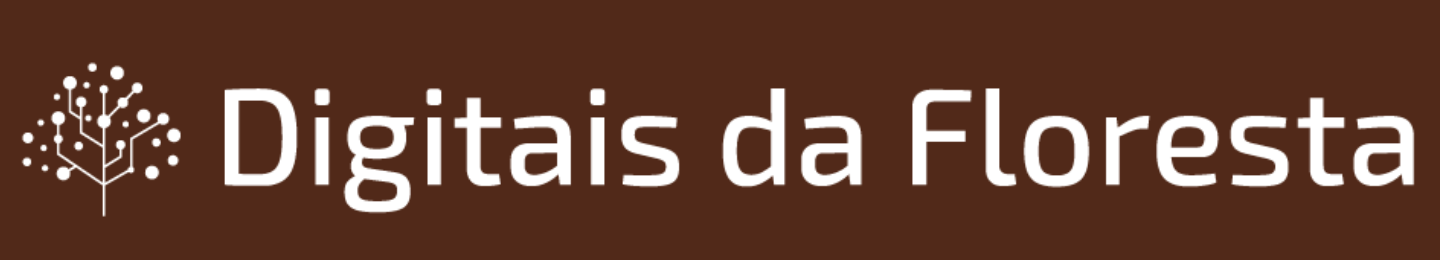

# **Welcome to the Ddf Earth Engine API**

This colab walks through using and modifying the Python library. This library allows you to download reference sample data and raster based geospatial data.

It also provides an API for uploading rasters such as isoscapes to earth engine for use within TimberID.

The first step is to import a stub library which downloads the source code.

This open source library can be imported one of two ways as shown below. This streamlines contributions back to the library.


In [ ]:
# This stub (ddfimport) allows the Ddf EE API to be imported.
import sys
!if [ ! -d "/content/ddf_common_stub" ] ; then git clone -b test https://github.com/tnc-br/ddf_common_stub.git; fi
sys.path.append("/content/ddf_common_stub/")
import ddfimport

# Use this line to import from a branch of the github repository.
# It will git clone the git repository under a google drive path.
# This allows you to modify the source files by opening the file view and
# changing files under /content/gdrive/MyDrive/<branch_name>
# ddfimport.ddf_source_control_pane()

# Alternatively, you can use this line to import from Main.
# If you import from Main, you will not be able to change files, but will not
# need a Google Login for Google Drive.
ddfimport.ddf_import_common()


If you chose 'ddf_source_control_pane' above, you will see that it prompted for an email and branch and prompted for a google login.  Once it has been cloned, another dialog shows for performing a `git commit`. You do not need to perform that step until you have made changes.

You should be able to see source code by opening the colab folder view and navigating to /content/gdrive/MyDrive/branch_name. Here you may double click .py libraries and edit them within your colab.  


At this point the eeddf library is available for importing.

In [ ]:
import importlib
import eeddf

# Its important to reload the module only if you make local changes to it.
# If you make changes to other modules, they should similarly be reloaded here.
importlib.reload(eeddf)


You may now initialize the ddf ee library.  

**IMPORTANT:** You must register in TimberID.org with a valid Google account (e.g. gmail) for initialize_ddf to succeed. Registering grants permission to the Earth Engine project.



In [ ]:
# This may prompt for your Google account credentials to authenticate for
# Earth Engine. You may pass in an argument test_environment = True to access
# test data.
eeddf.initialize_ddf(test_environment = True)


Load Reference Samples into a DataFrame is a fairly simple one line call.
This method will load all timber reference data that was originally imported into TimberID along with their latitude and longitude.


In [ ]:
# Replace 'google' with the name of your TimberID organization
# An optional second argument allows you to pass in an EE geospatial filter
# to further reduce the number of samples returned. For example, you can use
# this filter to return only samples from a particular region.
reference_samples = eeddf.load_reference_samples('google')

# We drop lat and lon here to remove sensitive data from open source.
# Please likewise be careful about committing sensitive colab output
print(reference_samples.drop(['lat', 'lon'], axis=1).head())


The Ddf Earth Engine API also streamlines access to earth engine rasters for machine learning.
There are operations to:
1. Query Earth Engine features efficiently from Earth Engine.
1. Set and Get metadata properties on Earth Engine rasters (such as isoscapes).
1. Upload (i.e. ingest) a new raster to earth engine from a local file.


In [ ]:
# dem is digital elevation from copernicus. See https://gee-community-catalog.org/projects/glo30/
dem = eeddf.dem()

# Brazil national territory extends 4,395 kilometers (2,731 mi) from north to
# south (5°16'20" N to 33°44'32" S latitude), and 4,319 kilometers (2,684 mi)
# from east to west (34°47'30" W to 73°59'32" W longitude)
# We query a point within Brazil.
value = dem.value_at(-50.0, -10.0)
print(f'Elevation at [-50, -10] is {value}')

# You may also bulk query multiple points for better performance using the
# `values_at` method. This operation is parallelized.
values = dem.values_at([[-50, -10], [-50, -9.5], [-40, -9.5], [-30, -10]])
print(values) #the last value is NaN indicating a water surface.


Elevation at [-50, -10] is 168.5
[168.5, 163.92420959472656, 452.7209777832031, nan]


In [ ]:
# The Ddf EE API also provides a helpful wrapper around EE APIs that allow
# upload and setting metadata properties

# replace this path with a path to your local raster file.
local_raster_path = "/content/test_isoscape.tiff"

# set arbitrary metadata on a local tif file
eeddf.stamp_isoscape(local_raster_path, "p_value", str(0.05))

# and then upload it to Earth Engine, preserving all tif metadata
# replace destination path with a valid earth engine asset location
destination_path = "projects/river-sky-386919/assets/testing/test_isoscape"
eeddf.ingest_isoscape(local_raster_path, destination_path, allow_overwrite=True)
